https://huggingface.co/h94/IP-Adapter-FaceID/discussions/38


In [4]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

my_path = '/content/package'
save_path = '/content/drive/MyDrive/Colab Notebooks/SD_packages'

os.symlink(save_path, my_path)
sys.path.insert(0, my_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install --target=$my_path diffusers
!pip install --target=$my_path PIL
!pip install --target=$my_path einops
!pip install --target=$my_path insightface
!pip install --target=$my_path onnxruntime

  Using cached diffusers-0.27.2-py3-none-any.whl (2.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.1/774.1 kB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
  Using cached einops-0.8.0-py3-none-any.whl (43 kB)
ERROR: Operation cancelled by user


In [15]:
!git clone https://huggingface.co/h94/IP-Adapter-FaceID IP-Adapter_faceid

Cloning into 'IP-Adapter_faceid'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 125 (delta 55), reused 0 (delta 0), pack-reused 3 (from 1)
Receiving objects: 100% (125/125), 863.26 KiB | 6.08 MiB/s, done.
Resolving deltas: 100% (55/55), done.
error: unable to write file ip-adapter-faceid_sdxl.bin
error: unable to write file ip-adapter-faceid-plusv2_sdxl.bin
Filtering content: 100% (18/18), 2.98 GiB | 23.70 MiB/s, done.
fatal: unable to checkout working tree
You can inspect what was checked out with 'git status'
and retry with 'git restore --source=HEAD :/'



In [4]:
!pip install git+https://github.com/tencent-ailab/IP-Adapter.git
!git clone https://github.com/tencent-ailab/IP-Adapter.git

  Cloning https://github.com/tencent-ailab/IP-Adapter.git to /tmp/pip-req-build-0y0nbbs7
  Running command git clone --filter=blob:none --quiet https://github.com/tencent-ailab/IP-Adapter.git /tmp/pip-req-build-0y0nbbs7
  Resolved https://github.com/tencent-ailab/IP-Adapter.git to commit 11a904682126e5dfdd0c1ce86fdb435e9e01c1e0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ip-adapter: filename=ip_adapter-0.1.0-py3-none-any.whl size=31292 sha256=c355de0af48713855301678928dbc50ab7a40c9e10741b80b71f118928b68405
  Stored in directory: /tmp/pip-ephem-wheel-cache-30nddhmc/wheels/db/b9/4a/cbddf1447388c3c9e674d4b1eb51f4661cd8ae89b90f34deee
Successfully built ip-adapter
Cloning into 'IP-Adapter'...
remote: Enumerating objects: 488, done.
remote: Counting objects: 100% (192/192), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 488 (delta 163), reused 132 (delta 132), 

In [5]:
import cv2
from insightface.app import FaceAnalysis
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler, AutoencoderKL
from PIL import Image

from ip_adapter.ip_adapter_faceid_separate import IPAdapterFaceID

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [11]:
app = FaceAnalysis(name="buffalo_l", providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))


images = ["/content/person.jpg", "/content/person2.jpg", "/content/person3.jpg"]

faceid_embeds = []
for image in images:
    image = cv2.imread("person.jpg")
    faces = app.get(image)
    faceid_embeds.append(torch.from_numpy(faces[0].normed_embedding).unsqueeze(0).unsqueeze(0))

faceid_embeds = torch.cat(faceid_embeds, dim=1)

/usr/local/lib/python3.10/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [17]:
base_model_path = "SG161222/Realistic_Vision_V4.0_noVAE"
vae_model_path = "stabilityai/sd-vae-ft-mse"
ip_ckpt = "/content/IP-Adapter_faceid/ip-adapter-faceid-portrait_sd15.bin"
device = "cuda"

noise_scheduler = DDIMScheduler(
    num_train_timesteps=1000,
    beta_start=0.00085,
    beta_end=0.012,
    beta_schedule="scaled_linear",
    clip_sample=False,
    set_alpha_to_one=False,
    steps_offset=1,
)
vae = AutoencoderKL.from_pretrained(vae_model_path).to(dtype=torch.float16)
pipe = StableDiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    scheduler=noise_scheduler,
    vae=vae,
    feature_extractor=None,
    safety_checker=None
)


# load ip-adapter
ip_model = IPAdapterFaceID(pipe, ip_ckpt, device, num_tokens=16, n_cond=5)

# generate image
prompt = "photo of a men in jeans in a garden"
negative_prompt = "monochrome, lowres, bad anatomy, worst quality, low quality, blurry"

images = ip_model.generate(
    prompt=prompt, negative_prompt=negative_prompt, faceid_embeds=faceid_embeds, num_samples=4, width=512, height=512, num_inference_steps=30, seed=2023
)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [27]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

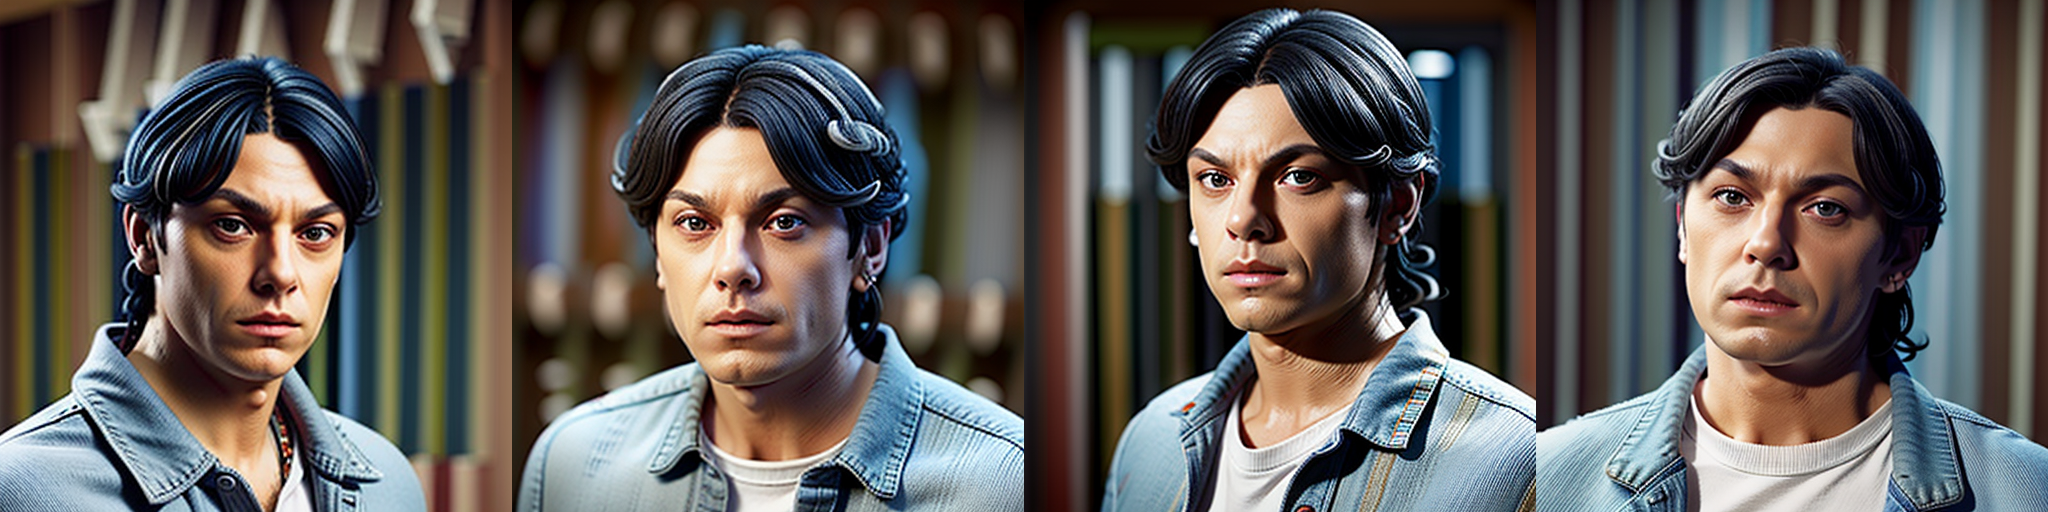

In [28]:
grid = image_grid(images, 1, 4)
grid